<a href="https://colab.research.google.com/github/cheeya89/cy199889/blob/master/Yi_Chen_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1



In [0]:
# To install package
import pandas as pd
# Import and read files, data turning is necessary
df=pd.read_csv('Bank Data CSV.csv')
listcolumns=['CustomerID','age', 'job', 'martial','education','balance','housing']
df=pd.read_csv('Bank Data CSV.csv', names=listcolumns, header=None, skiprows=6)


In [94]:
df.head()

,CustomerID,age,job,martial,education,balance,housing
0,0,58,management,married,tertiary,2143,yes
1,1,44,technician,single,secondary,29,yes
2,2,33,entrepreneur,married,secondary,2,yes
3,5,35,management,married,tertiary,231,yes
4,6,28,management,single,tertiary,447,yes


In [95]:
df2=pd.read_csv('Bank Data TXT.txt', delim_whitespace=True, encoding='utf-8')

df2.head()

,CustomerID,duration,campaign,response
0,0,4.35,1,no
1,1,2.52,1,no
2,2,1.27,1,no
3,5,2.32,1,no
4,6,3.62,1,no


In [96]:
# merge files:
dfcombined=pd.merge(df,df2, on='CustomerID')
dfcombined.head()

,CustomerID,age,job,martial,education,balance,housing,duration,campaign,response
0,0,58,management,married,tertiary,2143,yes,4.35,1,no
1,1,44,technician,single,secondary,29,yes,2.52,1,no
2,2,33,entrepreneur,married,secondary,2,yes,1.27,1,no
3,5,35,management,married,tertiary,231,yes,2.32,1,no
4,6,28,management,single,tertiary,447,yes,3.62,1,no


# Q2

In [97]:
dfcombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40841 entries, 0 to 40840
Data columns (total 10 columns):
CustomerID    40841 non-null int64
age           40841 non-null int64
job           40841 non-null object
martial       40841 non-null object
education     40841 non-null object
balance       40841 non-null int64
housing       40841 non-null object
duration      40841 non-null float64
campaign      40841 non-null int64
response      40841 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 3.4+ MB


In [98]:
dfcombined.describe()

,CustomerID,age,balance,duration,campaign
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,4.308949,2.774149
std,12919.797651,10.475473,1712.556186,4.305823,3.104177
min,0.000000,18.000000,-6847.000000,0.100000,1.000000
25%,10888.000000,33.000000,64.000000,1.730000,1.000000
50%,21652.000000,39.000000,421.000000,3.000000,2.000000
75%,33102.000000,48.000000,1333.000000,5.300000,3.000000
max,45209.000000,95.000000,10443.000000,81.970000,58.000000


In [99]:
dfcombined.count()

CustomerID    40841
age           40841
job           40841
martial       40841
education     40841
balance       40841
housing       40841
duration      40841
campaign      40841
response      40841
dtype: int64

In [100]:
#Converting data types
dfcombined['CustomerID']=dfcombined['CustomerID'].astype('category')
dfcombined['balance']=dfcombined['balance'].astype('float')
dfcombined['job']=dfcombined['job'].astype('category')
dfcombined['martial']=dfcombined['martial'].astype('category')
dfcombined['education']=dfcombined['education'].astype('category')
dfcombined['housing']=dfcombined['housing'].astype('category')
dfcombined['response']=dfcombined['response'].astype('category')
dfcombined.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 40841 entries, 0 to 40840
Data columns (total 10 columns):
CustomerID    40841 non-null category
age           40841 non-null int64
job           40841 non-null category
martial       40841 non-null category
education     40841 non-null category
balance       40841 non-null float64
housing       40841 non-null category
duration      40841 non-null float64
campaign      40841 non-null int64
response      40841 non-null category
dtypes: category(6), float64(2), int64(2)
memory usage: 3.5 MB


There is no missing data.

# Q3


In [101]:
dfcombined.groupby('response').count()

,CustomerID,age,job,martial,education,balance,housing,duration,campaign
response,,,,,,,,,
no,36202,36202,36202,36202,36202,36202,36202,36202,36202
yes,4639,4639,4639,4639,4639,4639,4639,4639,4639


In [102]:
print(str(round((4639/(4639+36202)*100),2))+"%")
#11.36% of contacted customers acquired the product

11.36%


# Q4

In [103]:
dfcombined[dfcombined.response=="yes"]

,CustomerID,age,job,martial,education,balance,housing,duration,campaign,response
72,83,59,admin.,married,secondary,2343.0,yes,17.37,1,yes
75,86,56,admin.,married,secondary,45.0,no,24.45,1,yes
76,87,41,technician,married,secondary,1270.0,yes,23.15,1,yes
115,129,55,services,married,secondary,2476.0,yes,9.65,1,yes
149,168,54,admin.,married,tertiary,184.0,no,11.22,2,yes
...,...,...,...,...,...,...,...,...,...,...
40835,45204,73,retired,married,secondary,2850.0,no,5.00,1,yes
40836,45205,25,technician,single,secondary,505.0,no,6.43,2,yes
40837,45206,51,technician,married,tertiary,825.0,no,16.28,3,yes
40838,45207,71,retired,divorced,primary,1729.0,no,7.60,2,yes


In [104]:
dfyes=dfcombined[dfcombined.response=="yes"]
dfyes.head(4)

,CustomerID,age,job,martial,education,balance,housing,duration,campaign,response
72,83,59,admin.,married,secondary,2343.0,yes,17.37,1,yes
75,86,56,admin.,married,secondary,45.0,no,24.45,1,yes
76,87,41,technician,married,secondary,1270.0,yes,23.15,1,yes
115,129,55,services,married,secondary,2476.0,yes,9.65,1,yes


In [105]:
#List the 10 customers with the highest bank balances who also signed up for the product.
dfyes.sort_values(by='balance', ascending=False).head(10)

,CustomerID,age,job,martial,education,balance,housing,duration,campaign,response
36303,39686,32,blue-collar,married,secondary,10287.0,yes,4.68,4,yes
31174,33734,32,management,single,tertiary,10281.0,no,6.67,1,yes
31563,34182,45,blue-collar,married,secondary,10252.0,no,11.25,2,yes
37958,41613,45,blue-collar,married,secondary,10252.0,no,2.88,1,yes
22775,24084,49,admin.,married,secondary,10250.0,yes,1.62,1,yes
39124,43028,54,technician,married,secondary,10185.0,no,4.18,1,yes
29122,31380,53,technician,married,secondary,10185.0,no,1.92,1,yes
28995,31241,58,management,divorced,secondary,10180.0,no,3.00,2,yes
31139,33693,26,student,single,tertiary,10086.0,no,1.83,2,yes
19611,20811,50,self-employed,married,secondary,10052.0,no,11.08,2,yes


# Q5




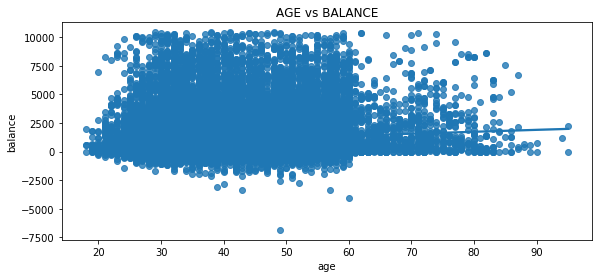

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = sns.regplot(x="age", y="balance", data=dfcombined)
plt.rcParams['figure.figsize'] = [9.5, 4]
plt.title("AGE vs BALANCE")
plt.show()

In [107]:
corr = dfcombined.corr()
corr
#The correlation between age and balance is 0.103405 as shown.

,age,balance,duration,campaign
age,1.000000,0.103405,-0.007422,0.003563
balance,0.103405,1.000000,0.035481,-0.026482
duration,-0.007422,0.035481,1.000000,-0.081852
campaign,0.003563,-0.026482,-0.081852,1.000000


# Q6

In [108]:
dict ={'self-employed':'Self-Employed','entrepreneur':'Self-Employed','blue-collar':'Trades','technician':'Trades','housemaid':'Services','services':'Services','other':'Services','student':'Non-Full Time','unemployed':'Non-Full Time','retired':'Non-Full Time','admin.':'Office Workers','management':'Office Workers'}
dffinal=dfcombined
dffinal['Job2']=dffinal['job'].apply(lambda x : dict[x])
dffinal=dffinal.drop(['job'], axis=1)
dffinal.head(5)



,CustomerID,age,martial,education,balance,housing,duration,campaign,response,Job2
0,0,58,married,tertiary,2143.0,yes,4.35,1,no,Office Workers
1,1,44,single,secondary,29.0,yes,2.52,1,no,Trades
2,2,33,married,secondary,2.0,yes,1.27,1,no,Self-Employed
3,5,35,married,tertiary,231.0,yes,2.32,1,no,Office Workers
4,6,28,single,tertiary,447.0,yes,3.62,1,no,Office Workers


# Q7

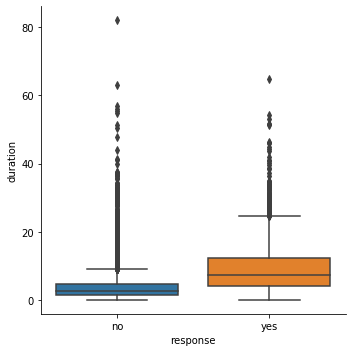

In [109]:
sns.catplot(x="response", y="duration", 
            kind="box", dodge=False, data=dffinal);

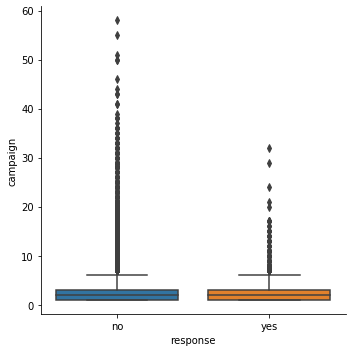

In [110]:
sns.catplot(x="response", y="campaign", 
            kind="box", dodge=False, data=dffinal);
            

In [111]:
import numpy as np
dffinal["responded"] = np.where(dffinal["response"].str.contains("yes"), 1,0)
dffinal.head(4)

,CustomerID,age,martial,education,balance,housing,duration,campaign,response,Job2,responded
0,0,58,married,tertiary,2143.0,yes,4.35,1,no,Office Workers,0
1,1,44,single,secondary,29.0,yes,2.52,1,no,Trades,0
2,2,33,married,secondary,2.0,yes,1.27,1,no,Self-Employed,0
3,5,35,married,tertiary,231.0,yes,2.32,1,no,Office Workers,0


In [112]:
corr = dffinal.corr()
corr

,age,balance,duration,campaign,responded
age,1.000000,0.103405,-0.007422,0.003563,0.023204
balance,0.103405,1.000000,0.035481,-0.026482,0.069456
duration,-0.007422,0.035481,1.000000,-0.081852,0.400681
campaign,0.003563,-0.026482,-0.081852,1.000000,-0.072495
responded,0.023204,0.069456,0.400681,-0.072495,1.000000


From the graphs and correlation above, we can see that there is no evident linear relationship (-0.072495) between response and campaign, having more conversations with the client does not help. 
For response and duration (0.400681), they are weakly positively correlated, which means salespeople were more successful when they kept customers on the phone longer.

# Q8

In [113]:
def revise(x):
    if x < 5:
        return x * 2
    elif x > 25:
        return x*2/3
    else:
        return x
        
dffinal['DurationRevised'] = dffinal['duration'].apply(lambda x: revise(x))
dffinal.head()




,CustomerID,age,martial,education,balance,housing,duration,campaign,response,Job2,responded,DurationRevised
0,0,58,married,tertiary,2143.0,yes,4.35,1,no,Office Workers,0,8.70
1,1,44,single,secondary,29.0,yes,2.52,1,no,Trades,0,5.04
2,2,33,married,secondary,2.0,yes,1.27,1,no,Self-Employed,0,2.54
3,5,35,married,tertiary,231.0,yes,2.32,1,no,Office Workers,0,4.64
4,6,28,single,tertiary,447.0,yes,3.62,1,no,Office Workers,0,7.24


# Q9

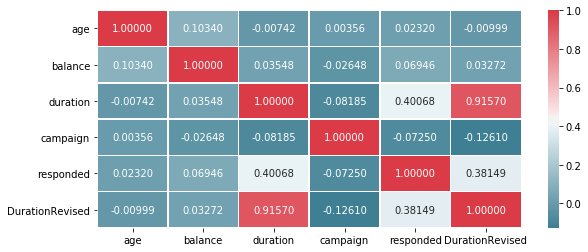

In [114]:
corr = dffinal.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".5f")
plt.show()

In [115]:
corr

,age,balance,duration,campaign,responded,DurationRevised
age,1.000000,0.103405,-0.007422,0.003563,0.023204,-0.009990
balance,0.103405,1.000000,0.035481,-0.026482,0.069456,0.032719
duration,-0.007422,0.035481,1.000000,-0.081852,0.400681,0.915703
campaign,0.003563,-0.026482,-0.081852,1.000000,-0.072495,-0.126103
responded,0.023204,0.069456,0.400681,-0.072495,1.000000,0.381491
DurationRevised,-0.009990,0.032719,0.915703,-0.126103,0.381491,1.000000


Based on the heatmap and correlation table, it is easy to see that three variables that had the most bearing on responded ("yes" for response) are duration (correlation coefficient of 0.4), duration revised (0.38) and balance (0.07). It means that these three factors had the highest positive correlation with successful response relative to other factors. 